<a href="https://colab.research.google.com/github/smileSD/Data-manipulation-and-visualization/blob/main/Google_Trends_and_Data_Visualisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Google Trends gives us an estimate of search volume. Analyzing Tesla, Bitcoin and Unemployment rate from the trends in Google search. 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
df_tesla.columns
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [ ]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search:{df_tesla.TSLA_WEB_SEARCH.min()} ')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search:2 


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
df_tesla_month=df_tesla.MONTH.str.split('-',n=0,expand=True).iloc[:,0]

In [ ]:
 df_tesla_month.head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: 0, dtype: object

### Unemployment Data

In [ ]:
df_unemployment.columns
df_unemployment.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9
180,2019-01,21,4.0


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [ ]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [ ]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [ ]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

In [ ]:
df_btc_price.isna().values.sum()

2

In [ ]:
df_btc_price.dropna()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Convert Strings to DateTime Objects

In [ ]:
type(df_tesla.MONTH[0])

str

In [ ]:
df_tesla.MONTH=pd.to_datetime(df_tesla.MONTH)
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [ ]:
df_btc_price.DATE=pd.to_datetime(df_btc_price.DATE)
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [ ]:
df_btc_monthly=df_btc_price.resample("M", on="DATE").last()

In [ ]:
df_btc_monthly.shape
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

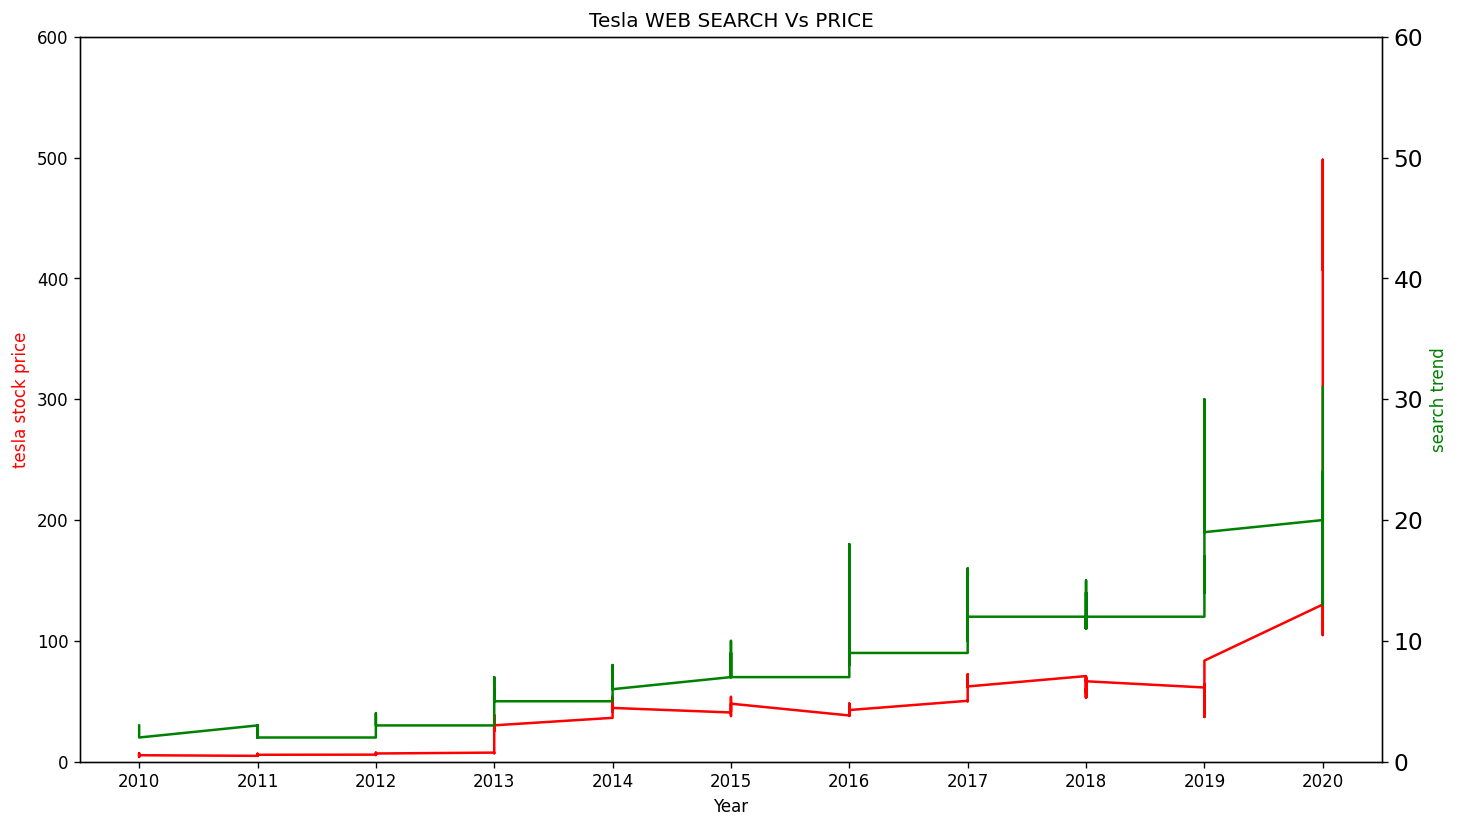

In [ ]:
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla WEB SEARCH Vs PRICE")
axis1=plt.gca()
axis2=axis1.twinx()
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
axis1.set_ylim([0,600])
axis2.set_ylim([0,60])
axis1.set_xlabel("Year")
axis1.set_ylabel("tesla stock price", color="red")
axis2.set_ylabel("search trend", color="green")
axis1.plot(df_tesla_month, df_tesla.TSLA_USD_CLOSE, color="red")
axis2.plot(df_tesla_month, df_tesla.TSLA_WEB_SEARCH, color="green") 
plt.show()

In [ ]:

years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

### Tesla Stock Price v.s. Search Volume

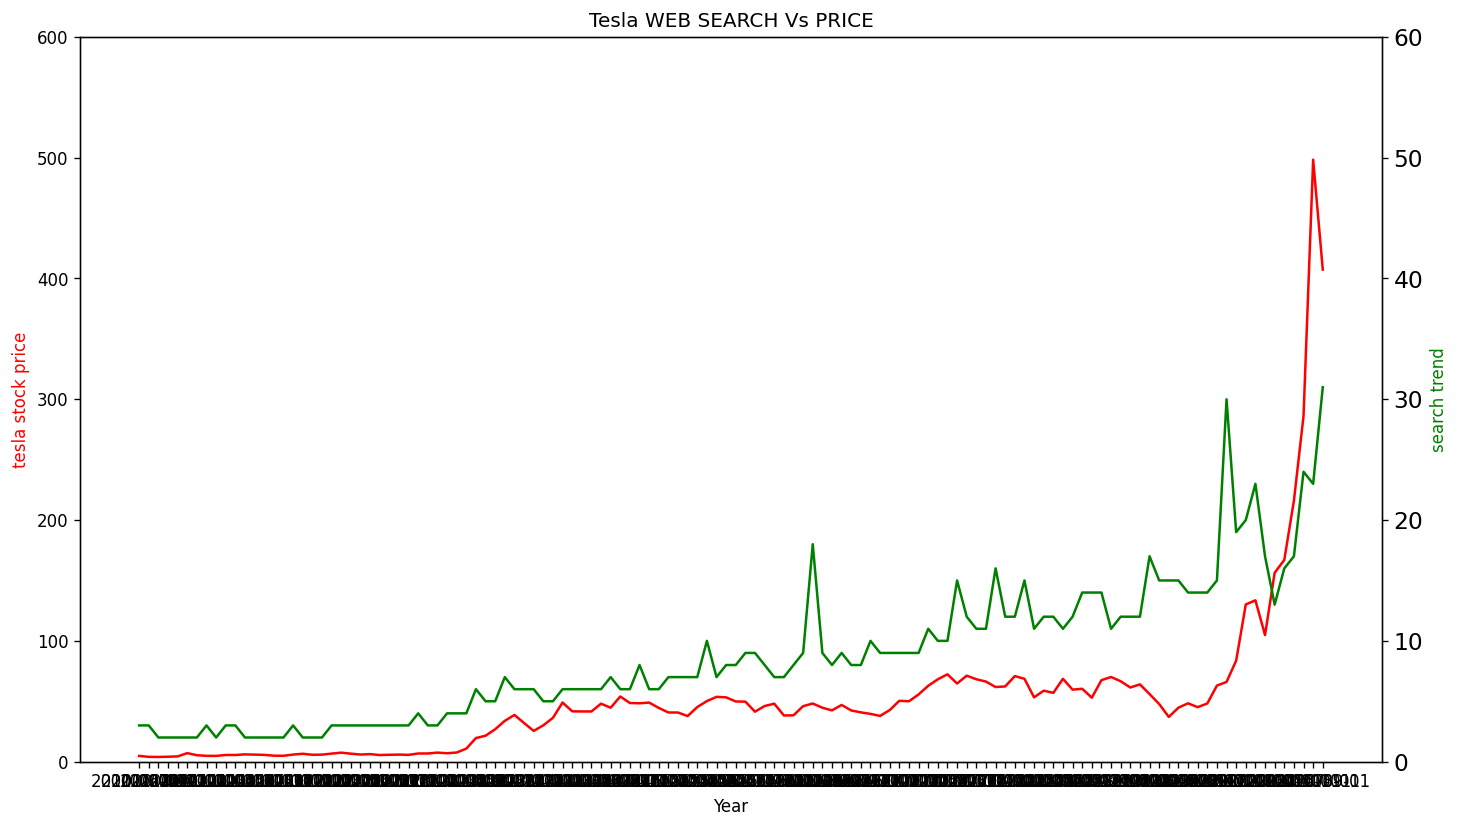

In [ ]:
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla WEB SEARCH Vs PRICE")
axis1=plt.gca()
axis2=axis1.twinx()
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
axis1.set_ylim([0,600])
axis2.set_ylim([0,60])
axis1.set_xlabel("Year")
axis1.set_ylabel("tesla stock price", color="red")
axis2.set_ylabel("search trend", color="green")
axis1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="red")
axis2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="green") 
plt.show()

In [ ]:
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

### Bitcoin (BTC) Price v.s. Search Volume

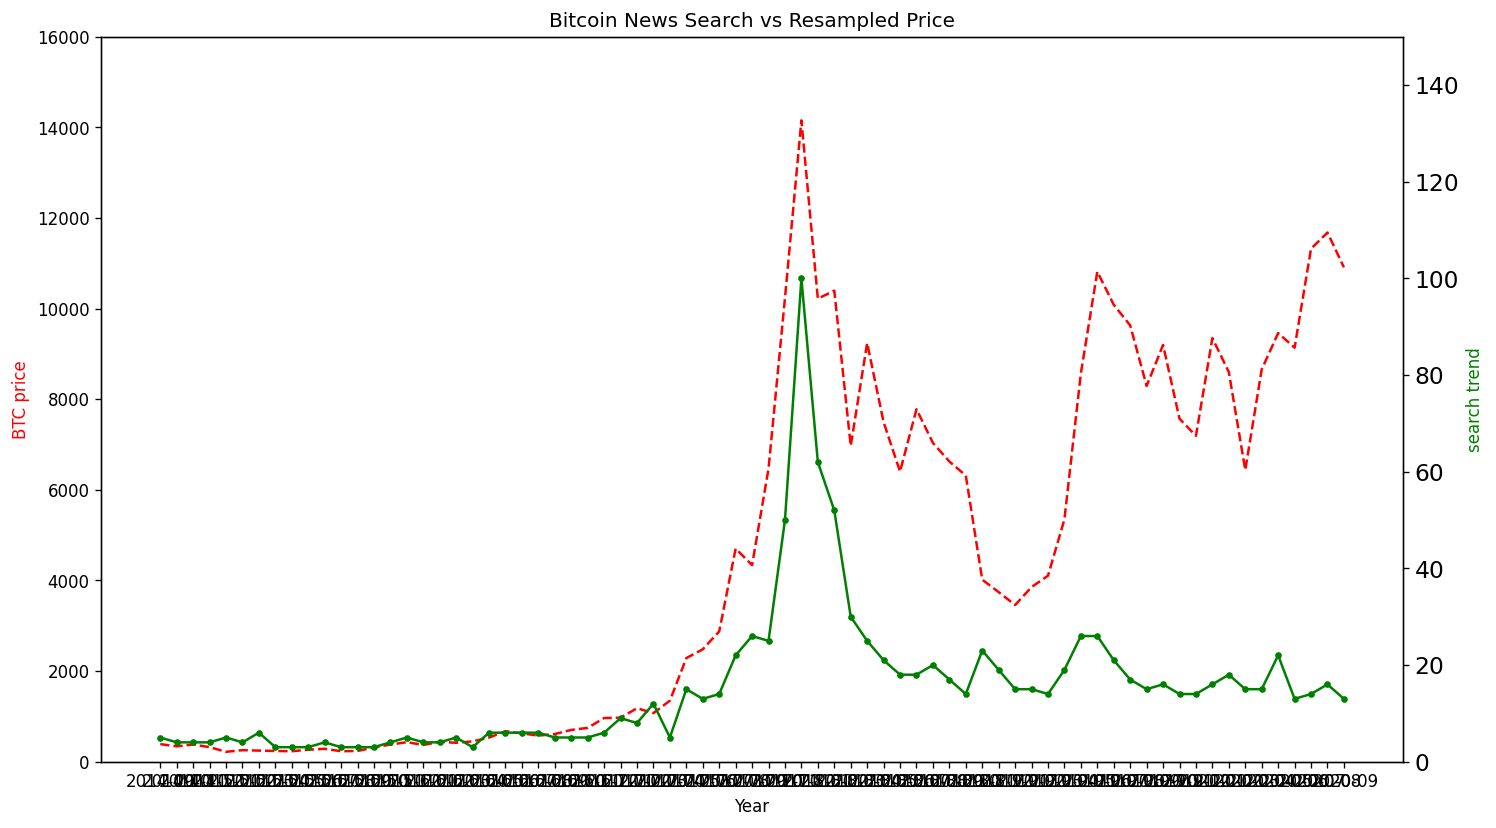

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')
plt.title("Bitcoin News Search vs Resampled Price")
x=df_btc_search.MONTH
axis1=plt.gca()
axis2=axis1.twinx()
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
axis1.set_ylim([0,16000])
axis2.set_ylim([0,150])
axis1.set_xlabel("Year")
axis1.set_ylabel("BTC price", color="red")
axis2.set_ylabel("search trend", color="green")
axis1.plot(df_btc_search.MONTH, df_btc_monthly.CLOSE, color="red", linestyle="dashed")
axis2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="green", marker=".") 
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

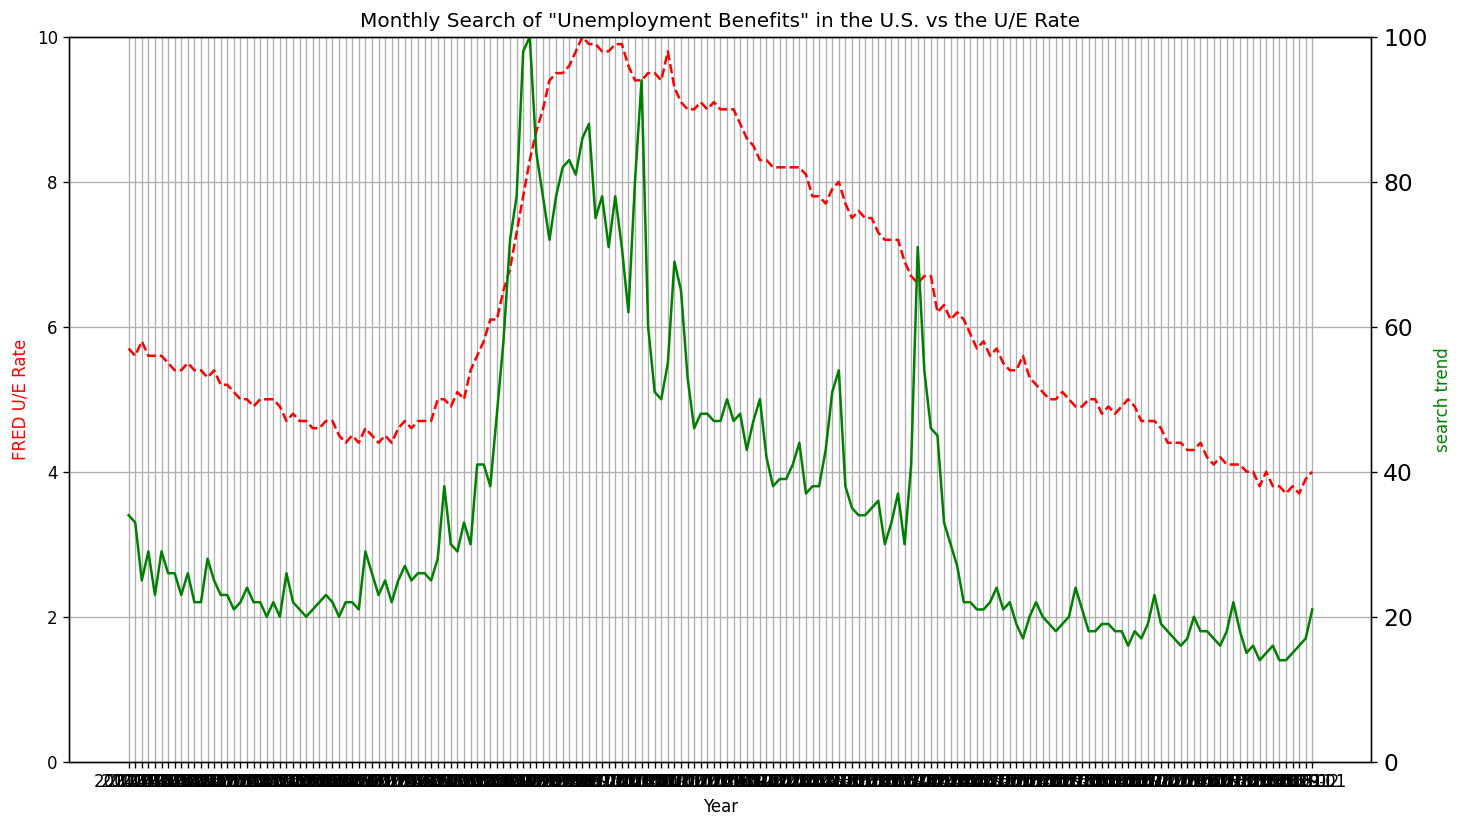

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
axis1=plt.gca()
axis2=axis1.twinx()
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
axis1.set_ylim([0,10])
axis2.set_ylim([0,100])
axis1.set_xlabel("Year")
axis1.set_ylabel("FRED U/E Rate", color="red")
axis2.set_ylabel("search trend", color="green")
axis1.grid()
axis1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="red", linestyle="dashed")
axis2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="green") 
plt.show()

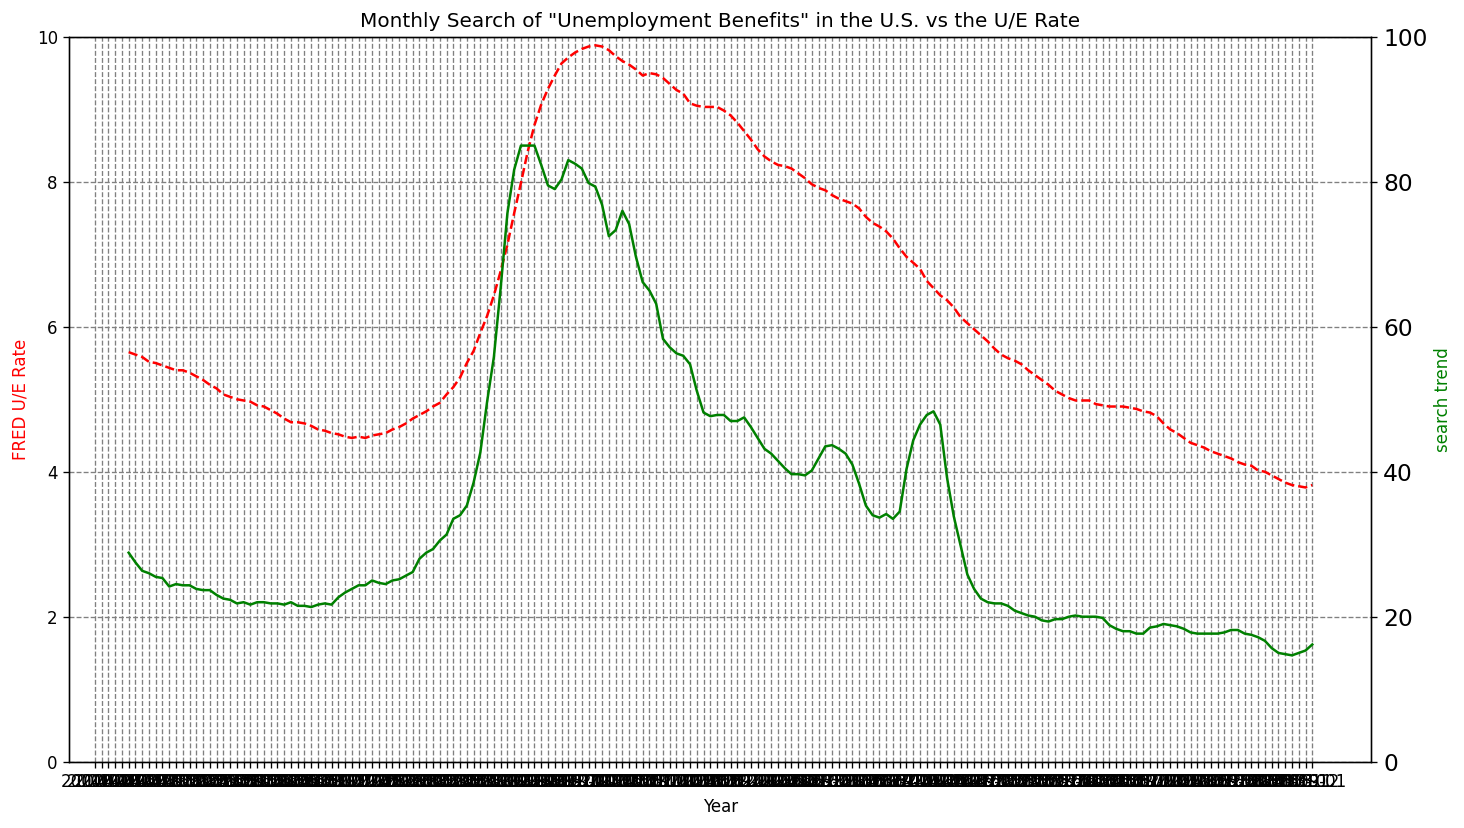

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
axis1=plt.gca()
axis2=axis1.twinx()
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
axis1.set_ylim([0,10])
axis2.set_ylim([0,100])
axis1.set_xlabel("Year")
axis1.set_ylabel("FRED U/E Rate", color="red")
axis2.set_ylabel("search trend", color="green")
axis1.grid(color='grey', linestyle='--')
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
axis1.plot(df_unemployment.MONTH, roll_df.UNRATE, color="red", linestyle="dashed")
axis2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color="green") 
plt.show()